In [1]:
import pandas as pd

df = pd.read_csv('data/loan_data_sample.csv', index_col='SK_ID_CURR')
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE
SK_ID_CURR,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Secondary / secondary special
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Higher education
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Secondary / secondary special
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Secondary / secondary special
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Secondary / secondary special


In [2]:
numeric_df = df.copy()
numeric_df['NAME_CONTRACT_TYPE'] = numeric_df['NAME_CONTRACT_TYPE'].map(
    {'Cash loans': 0, 'Revolving loans': 1})
numeric_df['CODE_GENDER'] = numeric_df['CODE_GENDER'].map({'M': 0, 'F': 1})
numeric_df['FLAG_OWN_CAR'] = numeric_df['FLAG_OWN_CAR'].map({'N': 0, 'Y': 1})
numeric_df['FLAG_OWN_REALTY'] = numeric_df['FLAG_OWN_REALTY'].map(
    {'N': 0, 'Y': 1})
numeric_df['NAME_EDUCATION_TYPE'] = \
    numeric_df['NAME_EDUCATION_TYPE'].map({'Lower secondary': 0,
                                       'Secondary / secondary special': 0,
                                       'Incomplete higher': 1,
                                       'Higher education': 2,
                                       'Academic degree': 2})
numeric_df.dropna(inplace=True)

In [3]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307217 entries, 100002 to 456255
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   TARGET               307217 non-null  int64  
 1   NAME_CONTRACT_TYPE   307217 non-null  int64  
 2   CODE_GENDER          307217 non-null  float64
 3   FLAG_OWN_CAR         307217 non-null  int64  
 4   FLAG_OWN_REALTY      307217 non-null  int64  
 5   CNT_CHILDREN         307217 non-null  int64  
 6   AMT_INCOME_TOTAL     307217 non-null  float64
 7   AMT_CREDIT           307217 non-null  float64
 8   AMT_ANNUITY          307217 non-null  float64
 9   AMT_GOODS_PRICE      307217 non-null  float64
 10  NAME_EDUCATION_TYPE  307217 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 28.1 MB


<AxesSubplot:ylabel='Frequency'>

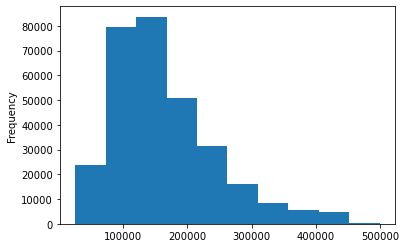

In [4]:
numeric_df[numeric_df['AMT_INCOME_TOTAL'] < 500000]['AMT_INCOME_TOTAL'].plot.hist()

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

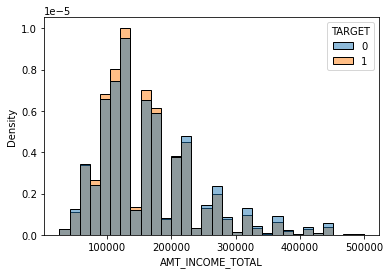

In [5]:
import seaborn as sns

sns.histplot(numeric_df[numeric_df['AMT_INCOME_TOTAL'] < 500000],
             x='AMT_INCOME_TOTAL',
             hue='TARGET',
             common_norm=False,
             stat='density',
             bins=30)

Fractions of data in the split nodes from example 1

In [6]:
print(numeric_df['TARGET'].value_counts())
print(numeric_df['TARGET'].value_counts(normalize=True))

0    282413
1     24804
Name: TARGET, dtype: int64
0    0.919262
1    0.080738
Name: TARGET, dtype: float64


In [7]:
print(numeric_df[numeric_df['AMT_INCOME_TOTAL'] < 200000]['TARGET'].value_counts())
print(numeric_df[numeric_df['AMT_INCOME_TOTAL'] < 200000]['TARGET'].value_counts(normalize=True))

0    200816
1     18532
Name: TARGET, dtype: int64
0    0.915513
1    0.084487
Name: TARGET, dtype: float64


In [8]:
print(numeric_df[numeric_df['AMT_INCOME_TOTAL'] >= 200000]['TARGET'].value_counts())
print(numeric_df[numeric_df['AMT_INCOME_TOTAL'] >= 200000]['TARGET'].value_counts(normalize=True))

0    81597
1     6272
Name: TARGET, dtype: int64
0    0.928621
1    0.071379
Name: TARGET, dtype: float64


Gini calculations for the split nodes from the example in figure 1.

In [9]:
1 - 0.92 ** 2 - 0.08 ** 2

0.14719999999999997

In [10]:
1 - 0.93 ** 2 - 0.07 ** 2

0.1301999999999999

## Fitting a decision tree

In [11]:
from sklearn.model_selection import train_test_split

features = numeric_df.drop('TARGET', axis=1)
targets = numeric_df['TARGET']

x_train, x_test, y_train, y_test = train_test_split(features,
                                                    targets,
                                                    stratify=targets,
                                                    random_state=42)

In [12]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
print(f'Train accuracy: {dt.score(x_train, y_train)}')
print(f'Test accuracy: {dt.score(x_test, y_test)}')

Train accuracy: 0.9835772442407513
Test accuracy: 0.857092637198099


In [13]:
dt.get_depth()

49

In [14]:
small_dt = DecisionTreeClassifier(max_depth=2, max_features=None)
small_dt.fit(x_train, y_train)
print(f'Train accuracy: {small_dt.score(x_train, y_train)}')
print(f'Test accuracy: {small_dt.score(x_test, y_test)}')

Train accuracy: 0.9192620176032499
Test accuracy: 0.9192630688106244


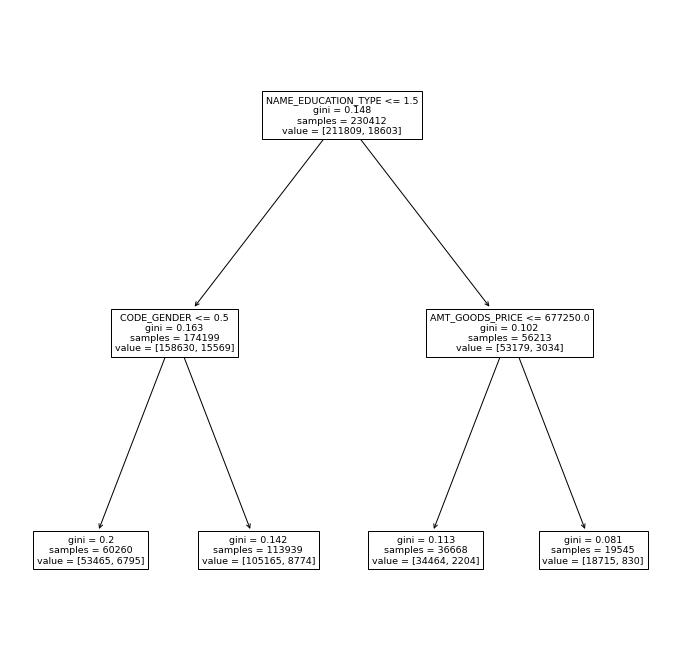

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12, 12))
_ = plot_tree(small_dt, feature_names=features.columns)

# Random forests

## sklearn

In [16]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)
rfc.fit(x_train, y_train)
print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))

0.9192880579136503
0.9192630688106244


In [17]:
features.shape

(307217, 10)

In [18]:
from sklearn.model_selection import GridSearchCV

x_tr_sample = x_train.sample(1000)
y_tr_sample = y_train.loc[x_tr_sample.index]

params = {'n_estimators': [100, 300, 500],
         'max_depth': [10, 15, 20],
         'max_features': [3, 6, 9],
         'random_state': [42],
         'n_jobs': [-1]}
gs = GridSearchCV(RandomForestClassifier(), param_grid=params)
gs.fit(x_tr_sample, y_tr_sample)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 15, 20], 'max_features': [3, 6, 9],
                         'n_estimators': [100, 300, 500], 'n_jobs': [-1],
                         'random_state': [42]})

In [19]:
gs.best_estimator_

RandomForestClassifier(max_depth=10, max_features=3, n_estimators=300,
                       n_jobs=-1, random_state=42)

In [20]:
gs.best_score_

0.914

## H2O random forests

In [21]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM Zulu11.43+55-CA (build 11.0.9.1+1-LTS, mixed mode)
  Starting server from C:\Users\words\anaconda3\envs\datasci\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\words\AppData\Local\Temp\tmp3e0k1gej
  JVM stdout: C:\Users\words\AppData\Local\Temp\tmp3e0k1gej\h2o_words_started_from_python.out
  JVM stderr: C:\Users\words\AppData\Local\Temp\tmp3e0k1gej\h2o_words_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Berlin
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.1
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_words_zpjqjq
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.971 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [22]:
hf = h2o.H2OFrame(df)
hf['TARGET'] = hf['TARGET'].asfactor()
train, valid = hf.split_frame(ratios=[.8], seed=42)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [23]:
hf.columns

['TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_EDUCATION_TYPE']

In [24]:
from h2o.estimators import H2ORandomForestEstimator

drf = H2ORandomForestEstimator(ntrees=100, max_depth=10, mtries=3)
feature_columns = hf.columns
feature_columns.remove('TARGET')
target_column = 'TARGET'
drf.train(x=feature_columns,
          y=target_column,
          training_frame=train,
          validation_frame=valid)

drf Model Build progress: |████████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1632656273839_1


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,100.0,100.0,724661.0,10.0,10.0,10.0,435.0,681.0,571.91




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.07237406064005739
RMSE: 0.2690242751873098
LogLoss: 0.2701003092548479
Mean Per-Class Error: 0.3962023279044521
AUC: 0.642569067776072
AUCPR: 0.13884587208078672
Gini: 0.28513813555214407

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1041567868288738: 


,,0,1,Error,Rate
0,0,182816.0,43556.0,0.1924,(43556.0/226372.0)
1,1,12334.0,7468.0,0.6229,(12334.0/19802.0)
2,Total,195150.0,51024.0,0.227,(55890.0/246174.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.104157,0.210883,172.0
1,max f2,0.071421,0.333188,257.0
2,max f0point5,0.134951,0.183124,113.0
3,max accuracy,0.391714,0.919553,0.0
4,max precision,0.215740,0.282288,25.0
5,max recall,0.005494,1.000000,395.0
6,max specificity,0.391714,0.999991,0.0
7,max absolute_mcc,0.104157,0.123942,172.0
8,max min_per_class_accuracy,0.078830,0.601606,235.0
9,max mean_per_class_accuracy,0.086754,0.603798,214.0



Gains/Lift Table: Avg response rate:  8.04 %, avg score:  8.05 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010001,0.184589,2.974133,2.974133,0.239236,0.202670,0.239236,0.202670,0.029744,0.029744,197.413291,197.413291,0.021470
1,2,0.020002,0.170984,2.474236,2.724185,0.199025,0.176806,0.219131,0.189738,0.024745,0.054489,147.423621,172.418456,0.037504
2,3,0.030003,0.164201,2.474236,2.640868,0.199025,0.167392,0.212429,0.182289,0.024745,0.079234,147.423621,164.086844,0.053538
3,4,0.040000,0.158335,2.202460,2.531300,0.177164,0.161224,0.203615,0.177024,0.022018,0.101252,120.245986,153.129969,0.066610
4,5,0.050001,0.152543,2.191466,2.463327,0.176279,0.155428,0.198148,0.172705,0.021917,0.123169,119.146635,146.332750,0.079569
5,6,0.100002,0.128886,1.860373,2.161850,0.149647,0.139984,0.173897,0.156344,0.093021,0.216190,86.037280,116.185015,0.126351
6,7,0.150000,0.115092,1.577708,1.967147,0.126909,0.121488,0.158235,0.144726,0.078881,0.295071,57.770815,96.714669,0.157762
7,8,0.200001,0.105179,1.433154,1.833646,0.115282,0.109980,0.147497,0.136039,0.071659,0.366731,43.315364,83.364572,0.181315
8,9,0.299999,0.090587,1.199898,1.622399,0.096519,0.097342,0.130504,0.123140,0.119988,0.486719,19.989830,62.239944,0.203053
9,10,0.400002,0.079696,1.021084,1.472068,0.082135,0.084930,0.118412,0.113588,0.102111,0.588829,2.108409,47.206755,0.205346




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.07345911813833579
RMSE: 0.2710334262380487
LogLoss: 0.2731115095295926
Mean Per-Class Error: 0.3894465859786751
AUC: 0.6468799635608792
AUCPR: 0.14543175451206425
Gini: 0.29375992712175836

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.10020451418451361: 


,,0,1,Error,Rate
0,0,44335.0,11979.0,0.2127,(11979.0/56314.0)
1,1,2959.0,2064.0,0.5891,(2959.0/5023.0)
2,Total,47294.0,14043.0,0.2435,(14938.0/61337.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.100205,0.216511,177.0
1,max f2,0.070661,0.339869,259.0
2,max f0point5,0.149814,0.186036,86.0
3,max accuracy,0.392638,0.918092,0.0
4,max precision,0.231044,0.377778,13.0
5,max recall,0.000824,1.000000,399.0
6,max specificity,0.392638,0.999982,0.0
7,max absolute_mcc,0.094853,0.130207,190.0
8,max min_per_class_accuracy,0.078624,0.606776,234.0
9,max mean_per_class_accuracy,0.083596,0.610553,219.0



Gains/Lift Table: Avg response rate:  8.19 %, avg score:  8.05 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010010,0.184120,3.281519,3.281519,0.268730,0.202545,0.268730,0.202545,0.032849,0.032849,228.151902,228.151902,0.024876
1,2,0.020004,0.170087,2.589657,2.935870,0.212072,0.176454,0.240424,0.189510,0.025881,0.058730,158.965691,193.586990,0.042180
2,3,0.030015,0.163642,2.287119,2.719502,0.187296,0.166758,0.222705,0.181922,0.022895,0.081625,128.711932,171.950224,0.056213
3,4,0.040008,0.158314,2.211169,2.592522,0.181077,0.161120,0.212306,0.176726,0.022098,0.103723,121.116859,159.252240,0.069397
4,5,0.050002,0.152166,2.251009,2.524264,0.184339,0.155170,0.206717,0.172417,0.022497,0.126219,125.100947,152.426435,0.083015
5,6,0.100005,0.128324,1.855374,2.189819,0.151940,0.139485,0.179328,0.155951,0.092773,0.218993,85.537412,118.981923,0.129601
6,7,0.150007,0.114466,1.644355,2.007998,0.134659,0.121068,0.164439,0.144324,0.082222,0.301214,64.435517,100.799788,0.164694
7,8,0.200010,0.105011,1.361669,1.846416,0.111510,0.109614,0.151206,0.135646,0.068087,0.369301,36.166941,84.641576,0.184392
8,9,0.299998,0.090419,1.256365,1.649753,0.102886,0.097154,0.135101,0.122817,0.125622,0.494923,25.636476,64.975347,0.212312
9,10,0.400003,0.079515,1.023243,1.493119,0.083795,0.084799,0.122274,0.113312,0.102329,0.597253,2.324281,49.311942,0.214843




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-09-26 13:38:00,0.106 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2021-09-26 13:38:01,0.650 sec,1.0,0.269889,0.329414,0.621941,0.126998,2.488358,0.271222,0.273356,0.320356,0.624625,0.128414,2.343741,0.270652
2,,2021-09-26 13:38:01,1.083 sec,2.0,0.270160,0.317230,0.624757,0.128457,2.607815,0.255810,0.272062,0.281228,0.632966,0.132405,2.517227,0.285651
3,,2021-09-26 13:38:02,1.246 sec,3.0,0.270189,0.308487,0.627186,0.129565,2.587800,0.260107,0.271654,0.276315,0.636756,0.135770,2.617999,0.282293
4,,2021-09-26 13:38:02,1.408 sec,4.0,0.269964,0.296778,0.627443,0.129280,2.525204,0.265107,0.271530,0.275493,0.638233,0.135955,2.485999,0.312487
5,,2021-09-26 13:38:02,1.541 sec,5.0,0.269969,0.291586,0.628187,0.129144,2.474236,0.237460,0.271472,0.274862,0.639079,0.136478,2.641243,0.267212
6,,2021-09-26 13:38:02,1.684 sec,6.0,0.270055,0.289042,0.630978,0.131229,2.509535,0.238681,0.271301,0.274337,0.642137,0.138762,2.824095,0.278462
7,,2021-09-26 13:38:02,1.816 sec,7.0,0.270073,0.284879,0.631732,0.131385,2.504496,0.240981,0.271279,0.274348,0.641569,0.139360,2.915822,0.257968
8,,2021-09-26 13:38:02,1.952 sec,8.0,0.269927,0.282053,0.632691,0.131843,2.489385,0.224833,0.271219,0.274196,0.642328,0.140467,2.854327,0.289157
9,,2021-09-26 13:38:02,2.091 sec,9.0,0.269831,0.279119,0.633047,0.131307,2.499484,0.228418,0.271229,0.274199,0.642373,0.140382,2.969236,0.278527



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,AMT_GOODS_PRICE,7289.990234,1.000000,0.193643
1,AMT_CREDIT,6504.045898,0.892189,0.172766
2,AMT_ANNUITY,6000.647949,0.823135,0.159394
3,NAME_EDUCATION_TYPE,4551.021484,0.624284,0.120888
4,CODE_GENDER,4277.153320,0.586716,0.113613
5,AMT_INCOME_TOTAL,2803.550537,0.384575,0.074470
6,CNT_CHILDREN,2217.212402,0.304145,0.058896
7,FLAG_OWN_CAR,2106.106934,0.288904,0.055944
8,NAME_CONTRACT_TYPE,1273.515869,0.174694,0.033828
9,FLAG_OWN_REALTY,623.299927,0.085501,0.016557


In [25]:
drf

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1632656273839_1


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,100.0,100.0,724661.0,10.0,10.0,10.0,435.0,681.0,571.91




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.07237406064005739
RMSE: 0.2690242751873098
LogLoss: 0.2701003092548479
Mean Per-Class Error: 0.3962023279044521
AUC: 0.642569067776072
AUCPR: 0.13884587208078672
Gini: 0.28513813555214407

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1041567868288738: 


,,0,1,Error,Rate
0,0,182816.0,43556.0,0.1924,(43556.0/226372.0)
1,1,12334.0,7468.0,0.6229,(12334.0/19802.0)
2,Total,195150.0,51024.0,0.227,(55890.0/246174.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.104157,0.210883,172.0
1,max f2,0.071421,0.333188,257.0
2,max f0point5,0.134951,0.183124,113.0
3,max accuracy,0.391714,0.919553,0.0
4,max precision,0.215740,0.282288,25.0
5,max recall,0.005494,1.000000,395.0
6,max specificity,0.391714,0.999991,0.0
7,max absolute_mcc,0.104157,0.123942,172.0
8,max min_per_class_accuracy,0.078830,0.601606,235.0
9,max mean_per_class_accuracy,0.086754,0.603798,214.0



Gains/Lift Table: Avg response rate:  8.04 %, avg score:  8.05 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010001,0.184589,2.974133,2.974133,0.239236,0.202670,0.239236,0.202670,0.029744,0.029744,197.413291,197.413291,0.021470
1,2,0.020002,0.170984,2.474236,2.724185,0.199025,0.176806,0.219131,0.189738,0.024745,0.054489,147.423621,172.418456,0.037504
2,3,0.030003,0.164201,2.474236,2.640868,0.199025,0.167392,0.212429,0.182289,0.024745,0.079234,147.423621,164.086844,0.053538
3,4,0.040000,0.158335,2.202460,2.531300,0.177164,0.161224,0.203615,0.177024,0.022018,0.101252,120.245986,153.129969,0.066610
4,5,0.050001,0.152543,2.191466,2.463327,0.176279,0.155428,0.198148,0.172705,0.021917,0.123169,119.146635,146.332750,0.079569
5,6,0.100002,0.128886,1.860373,2.161850,0.149647,0.139984,0.173897,0.156344,0.093021,0.216190,86.037280,116.185015,0.126351
6,7,0.150000,0.115092,1.577708,1.967147,0.126909,0.121488,0.158235,0.144726,0.078881,0.295071,57.770815,96.714669,0.157762
7,8,0.200001,0.105179,1.433154,1.833646,0.115282,0.109980,0.147497,0.136039,0.071659,0.366731,43.315364,83.364572,0.181315
8,9,0.299999,0.090587,1.199898,1.622399,0.096519,0.097342,0.130504,0.123140,0.119988,0.486719,19.989830,62.239944,0.203053
9,10,0.400002,0.079696,1.021084,1.472068,0.082135,0.084930,0.118412,0.113588,0.102111,0.588829,2.108409,47.206755,0.205346




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.07345911813833579
RMSE: 0.2710334262380487
LogLoss: 0.2731115095295926
Mean Per-Class Error: 0.3894465859786751
AUC: 0.6468799635608792
AUCPR: 0.14543175451206425
Gini: 0.29375992712175836

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.10020451418451361: 


,,0,1,Error,Rate
0,0,44335.0,11979.0,0.2127,(11979.0/56314.0)
1,1,2959.0,2064.0,0.5891,(2959.0/5023.0)
2,Total,47294.0,14043.0,0.2435,(14938.0/61337.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.100205,0.216511,177.0
1,max f2,0.070661,0.339869,259.0
2,max f0point5,0.149814,0.186036,86.0
3,max accuracy,0.392638,0.918092,0.0
4,max precision,0.231044,0.377778,13.0
5,max recall,0.000824,1.000000,399.0
6,max specificity,0.392638,0.999982,0.0
7,max absolute_mcc,0.094853,0.130207,190.0
8,max min_per_class_accuracy,0.078624,0.606776,234.0
9,max mean_per_class_accuracy,0.083596,0.610553,219.0



Gains/Lift Table: Avg response rate:  8.19 %, avg score:  8.05 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010010,0.184120,3.281519,3.281519,0.268730,0.202545,0.268730,0.202545,0.032849,0.032849,228.151902,228.151902,0.024876
1,2,0.020004,0.170087,2.589657,2.935870,0.212072,0.176454,0.240424,0.189510,0.025881,0.058730,158.965691,193.586990,0.042180
2,3,0.030015,0.163642,2.287119,2.719502,0.187296,0.166758,0.222705,0.181922,0.022895,0.081625,128.711932,171.950224,0.056213
3,4,0.040008,0.158314,2.211169,2.592522,0.181077,0.161120,0.212306,0.176726,0.022098,0.103723,121.116859,159.252240,0.069397
4,5,0.050002,0.152166,2.251009,2.524264,0.184339,0.155170,0.206717,0.172417,0.022497,0.126219,125.100947,152.426435,0.083015
5,6,0.100005,0.128324,1.855374,2.189819,0.151940,0.139485,0.179328,0.155951,0.092773,0.218993,85.537412,118.981923,0.129601
6,7,0.150007,0.114466,1.644355,2.007998,0.134659,0.121068,0.164439,0.144324,0.082222,0.301214,64.435517,100.799788,0.164694
7,8,0.200010,0.105011,1.361669,1.846416,0.111510,0.109614,0.151206,0.135646,0.068087,0.369301,36.166941,84.641576,0.184392
8,9,0.299998,0.090419,1.256365,1.649753,0.102886,0.097154,0.135101,0.122817,0.125622,0.494923,25.636476,64.975347,0.212312
9,10,0.400003,0.079515,1.023243,1.493119,0.083795,0.084799,0.122274,0.113312,0.102329,0.597253,2.324281,49.311942,0.214843




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-09-26 13:38:00,0.106 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2021-09-26 13:38:01,0.650 sec,1.0,0.269889,0.329414,0.621941,0.126998,2.488358,0.271222,0.273356,0.320356,0.624625,0.128414,2.343741,0.270652
2,,2021-09-26 13:38:01,1.083 sec,2.0,0.270160,0.317230,0.624757,0.128457,2.607815,0.255810,0.272062,0.281228,0.632966,0.132405,2.517227,0.285651
3,,2021-09-26 13:38:02,1.246 sec,3.0,0.270189,0.308487,0.627186,0.129565,2.587800,0.260107,0.271654,0.276315,0.636756,0.135770,2.617999,0.282293
4,,2021-09-26 13:38:02,1.408 sec,4.0,0.269964,0.296778,0.627443,0.129280,2.525204,0.265107,0.271530,0.275493,0.638233,0.135955,2.485999,0.312487
5,,2021-09-26 13:38:02,1.541 sec,5.0,0.269969,0.291586,0.628187,0.129144,2.474236,0.237460,0.271472,0.274862,0.639079,0.136478,2.641243,0.267212
6,,2021-09-26 13:38:02,1.684 sec,6.0,0.270055,0.289042,0.630978,0.131229,2.509535,0.238681,0.271301,0.274337,0.642137,0.138762,2.824095,0.278462
7,,2021-09-26 13:38:02,1.816 sec,7.0,0.270073,0.284879,0.631732,0.131385,2.504496,0.240981,0.271279,0.274348,0.641569,0.139360,2.915822,0.257968
8,,2021-09-26 13:38:02,1.952 sec,8.0,0.269927,0.282053,0.632691,0.131843,2.489385,0.224833,0.271219,0.274196,0.642328,0.140467,2.854327,0.289157
9,,2021-09-26 13:38:02,2.091 sec,9.0,0.269831,0.279119,0.633047,0.131307,2.499484,0.228418,0.271229,0.274199,0.642373,0.140382,2.969236,0.278527



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,AMT_GOODS_PRICE,7289.990234,1.000000,0.193643
1,AMT_CREDIT,6504.045898,0.892189,0.172766
2,AMT_ANNUITY,6000.647949,0.823135,0.159394
3,NAME_EDUCATION_TYPE,4551.021484,0.624284,0.120888
4,CODE_GENDER,4277.153320,0.586716,0.113613
5,AMT_INCOME_TOTAL,2803.550537,0.384575,0.074470
6,CNT_CHILDREN,2217.212402,0.304145,0.058896
7,FLAG_OWN_CAR,2106.106934,0.288904,0.055944
8,NAME_CONTRACT_TYPE,1273.515869,0.174694,0.033828
9,FLAG_OWN_REALTY,623.299927,0.085501,0.016557


In [26]:
drf.F1()

[[0.1041567868288738, 0.21088300906446786]]

In [27]:
drf.model_performance(valid).F1()

[[0.10020451418451361, 0.2165110668205182]]

In [28]:
predictions = drf.predict(train)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [29]:
predictions

predict,p0,p1
1,0.830231,0.169769
0,0.950872,0.0491278
0,0.934884,0.0651158
0,0.907678,0.0923223
1,0.883214,0.116786
1,0.859216,0.140784
0,0.96621,0.0337899
0,0.961561,0.0384386
0,0.935768,0.0642319
0,0.931063,0.0689365


In [30]:
(predictions['p1'] > 0.097).as_data_frame()['p1'].values

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
save_path = h2o.save_model(model=drf, path='drf', force=True)

In [32]:
drf2 = h2o.load_model(path=save_path)

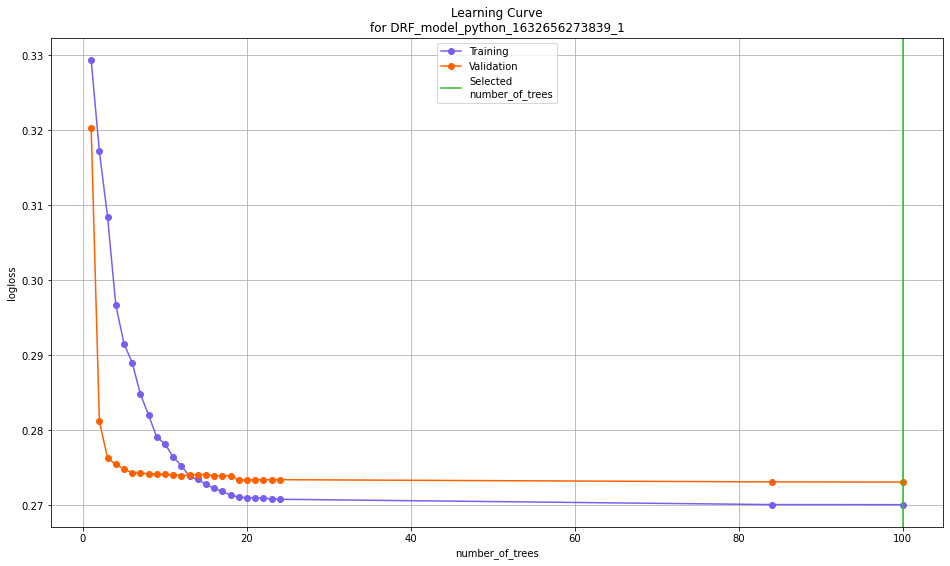

In [33]:
# if we don't save the output to the variable, the plot shows up twice
lc = drf.learning_curve_plot()

# Variable importances

In [34]:
drf.varimp()

[('AMT_GOODS_PRICE', 7289.990234375, 1.0, 0.1936430108106215),
 ('AMT_CREDIT', 6504.0458984375, 0.8921885612093852, 0.17276607920338183),
 ('AMT_ANNUITY', 6000.64794921875, 0.8231352520780447, 0.15939438851675247),
 ('NAME_EDUCATION_TYPE',
  4551.021484375,
  0.6242836187784245,
  0.12088815954000437),
 ('CODE_GENDER', 4277.1533203125, 0.5867159190617486, 0.1136134370576379),
 ('AMT_INCOME_TOTAL',
  2803.550537109375,
  0.38457534879670996,
  0.07447032842453984),
 ('CNT_CHILDREN', 2217.21240234375, 0.30414476989129197, 0.05889550896405344),
 ('FLAG_OWN_CAR', 2106.10693359375, 0.28890394443365325, 0.055944229635197115),
 ('NAME_CONTRACT_TYPE',
  1273.515869140625,
  0.17469376887989874,
  0.03382822737575844),
 ('FLAG_OWN_REALTY',
  623.2999267578125,
  0.08550079036028373,
  0.016556630472053104)]

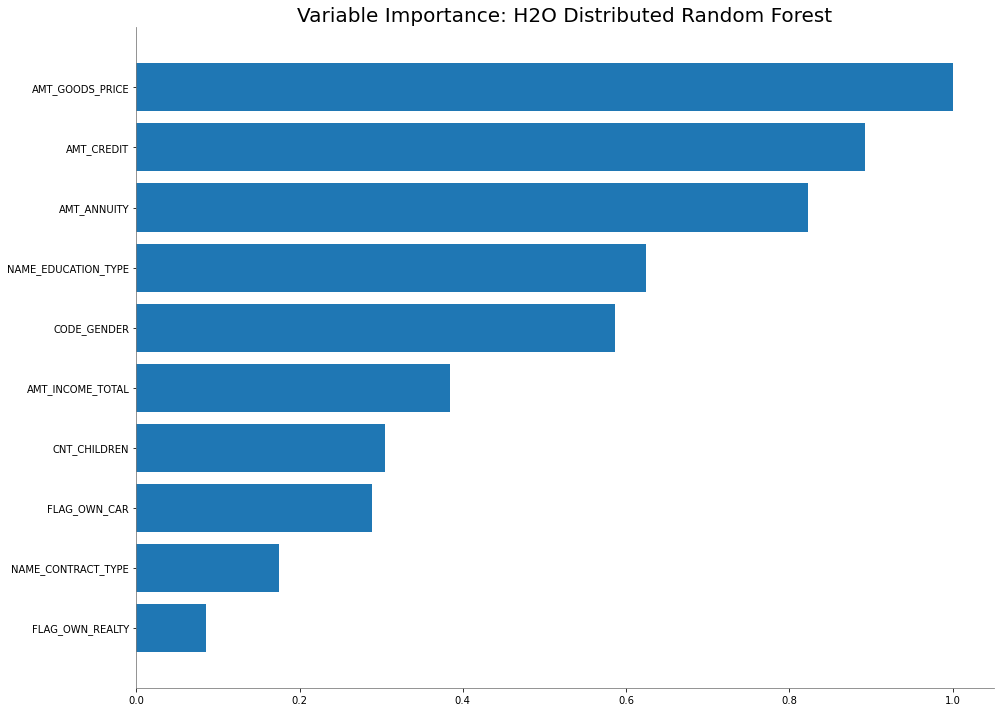

In [35]:
f = plt.figure(figsize=(5.5, 5.5))
drf.varimp_plot(server=True)
plt.tight_layout()

## sklearn feature importances

C:\Users\words\anaconda3\envs\datasci\lib\site-packages\yellowbrick\base.py:246: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


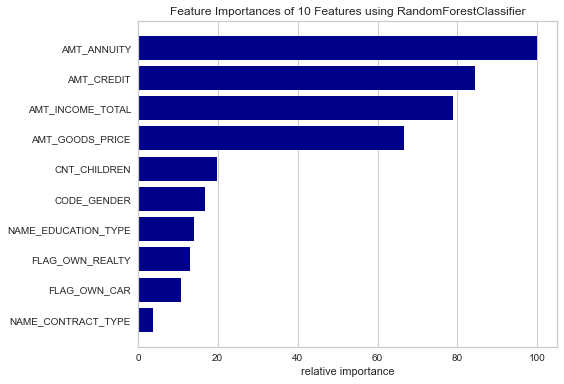

In [36]:
from yellowbrick.model_selection import feature_importances

_ = feature_importances(gs.best_estimator_,
                        x_train,
                        y_train,
                        colors=['darkblue'] * features.shape[0])
plt.tight_layout()

# Boosting

## AdaBoost

In [37]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(n_estimators=100,
                              learning_rate=0.5,
                              random_state=42)
adaboost.fit(x_train, y_train)
print(adaboost.score(x_train, y_train))
print(adaboost.score(x_test, y_test))

0.9192620176032499
0.9192630688106244


In [38]:
from pycaret.classification import setup, create_model, tune_model

# only use use_gpu=True if you have a GPU that can be used for fitting the models
classification = setup(data=numeric_df, target='TARGET')#, use_gpu=True)

,Description,Value
0,session_id,3185
1,Target,TARGET
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(307217, 11)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [39]:
adaboost = create_model('ada', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9190,0.6391,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9190,0.6334,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9190,0.6360,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.9190,0.6362,0.0000,0.0000,0.0000,0.0000,0.0000
SD,0.0000,0.0024,0.0000,0.0000,0.0000,0.0000,0.0000


In [40]:
tuned_adaboost, gridsearch = tune_model(adaboost, fold=3, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9190,0.6189,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9190,0.6141,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9190,0.6250,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.9190,0.6194,0.0000,0.0000,0.0000,0.0000,0.0000
SD,0.0000,0.0045,0.0000,0.0000,0.0000,0.0000,0.0000


In [41]:
tuned_adaboost.get_params()

{'algorithm': 'SAMME',
 'base_estimator': None,
 'learning_rate': 0.385,
 'n_estimators': 50,
 'random_state': 3185}

In [42]:
gridsearch.cv_results_['mean_test_score']

array([0.91901921, 0.91901921, 0.91901921, 0.91901921, 0.91901921,
       0.91901921, 0.91901921, 0.91901921, 0.91901921, 0.91901921])

## XGBoost

### PyCaret

In [43]:
xgb = create_model('xgboost', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9190,0.6520,0.0003,0.5000,0.0007,0.0006,0.0115
1,0.9189,0.6495,0.0002,0.1250,0.0003,0.0001,0.0017
2,0.9189,0.6494,0.0003,0.1818,0.0007,0.0004,0.0046
Mean,0.9190,0.6503,0.0003,0.2689,0.0006,0.0004,0.0059
SD,0.0000,0.0012,0.0001,0.1650,0.0002,0.0002,0.0041


In [44]:
best_xgb, tuner = tune_model(xgb,
                             fold=3,
                             search_library='scikit-optimize',
                             return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5453,0.6515,0.6775,0.1135,0.1944,0.0647,0.1153
1,0.5463,0.6445,0.6629,0.1118,0.1914,0.0613,0.1086
2,0.5620,0.6465,0.6488,0.1137,0.1935,0.0646,0.1111
Mean,0.5512,0.6475,0.6630,0.1130,0.1931,0.0635,0.1117
SD,0.0076,0.0030,0.0117,0.0008,0.0013,0.0016,0.0027


In [45]:
best_xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.8151062290297983,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 1.183398196079754e-06,
 'max_delta_step': 0,
 'max_depth': 10,
 'min_child_weight': 4,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 54,
 'n_jobs': -1,
 'num_parallel_tree': 1,
 'random_state': 3185,
 'reg_alpha': 0.026404291460424296,
 'reg_lambda': 4.000995799495568,
 'scale_pos_weight': 13.445266560541254,
 'subsample': 0.6939500747309946,
 'tree_method': 'auto',
 'validate_parameters': 1,
 'verbosity': 0}

In [46]:
tuner.cv_results_['mean_test_score']

[0.23815281026361187,
 0.11651189717787874,
 0.38232791291368096,
 0.5512180831523685,
 0.15998530581117967,
 0.11357305941381347,
 0.08695611738610841,
 0.43343671966184766,
 0.10248731696202296,
 0.10418923883171899]

In [47]:
type(best_xgb)

xgboost.sklearn.XGBClassifier

In [48]:
best_xgb.get_booster().get_score(importance_type='gain')

{'NAME_EDUCATION_TYPE_2': 3426.289154688889,
 'CODE_GENDER_1.0': 290.84590026277624,
 'AMT_GOODS_PRICE': 75.24478473990347,
 'FLAG_OWN_CAR_0': 58.94887414717144,
 'AMT_ANNUITY': 47.47685239649033,
 'NAME_EDUCATION_TYPE_0': 95.50173193870764,
 'AMT_INCOME_TOTAL': 24.196648820977497,
 'FLAG_OWN_REALTY_1': 20.290392928995644,
 'AMT_CREDIT': 51.58524987766978,
 'CNT_CHILDREN_0': 63.44035562176414,
 'CNT_CHILDREN_1': 21.18497789129102,
 'CNT_CHILDREN_3': 19.119630718857138,
 'CNT_CHILDREN_2': 22.105400216936303,
 'NAME_CONTRACT_TYPE_1': 155.1146054200812,
 'NAME_EDUCATION_TYPE_1': 31.244409251449998,
 'CNT_CHILDREN_4': 19.803395215214287}

In [49]:
best_xgb.feature_importances_

array([0.00547139, 0.01166456, 0.01073556, 0.0170145 , 0.03507482,
       0.06576665, 0.01332964, 0.0045881 , 0.01434526, 0.00479039,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00499852, 0.00432337, 0.00447798, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02159504, 0.00706505,
       0.77475923], dtype=float32)

#### xgboost with CPU

In [50]:
%%time
xgboost_cpu = create_model('xgboost', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9190,0.6520,0.0003,0.5000,0.0007,0.0006,0.0115
1,0.9189,0.6495,0.0002,0.1250,0.0003,0.0001,0.0017
2,0.9189,0.6494,0.0003,0.1818,0.0007,0.0004,0.0046
Mean,0.9190,0.6503,0.0003,0.2689,0.0006,0.0004,0.0059
SD,0.0000,0.0012,0.0001,0.1650,0.0002,0.0002,0.0041


Wall time: 12.7 s


#### xgboost with GPU

You should install CUDA first to use GPU, and XGBoost (at the time of writing) only supports GPUs in Windows and Linux. With conda, `conda install -c anaconda cudatoolkit`. Then you should use pip to install xgboost: `pip install xgboost`. However, installing `pycaret` with conda will also install xgboost from conda, which doesn't have GPU support. So you should remove xgboost with `conda remove --force xgboost` (without `--force` it will remove pycaret too). Then you can install xgboost with pip.

On Linux, there are also xgboost GPU packages available through conda such as `py-xgboost-gpu`. However, at the time of writing, these are older versions of xgboost than on pypi (through pip).

To install on MacOS, you will need to build xgboost from source (https://xgboost.readthedocs.io/en/latest/build.html).

One other option is to use a docker container with CUDA already installed.

The first time this is run it may take longer due to some first-time initialization. Try running it multiple times to get a better estimate for how long it takes after initializing the GPU for use.

In [51]:
%%time
xgboost_gpu = create_model('xgboost',
                           fold=3,
                           tree_method='gpu_hist',
                           gpu_id=0)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9190,0.6507,0.0005,0.3333,0.0010,0.0008,0.0104
1,0.9190,0.6479,0.0002,0.1667,0.0003,0.0002,0.0029
2,0.9190,0.6487,0.0009,0.3571,0.0017,0.0013,0.0141
Mean,0.9190,0.6491,0.0005,0.2857,0.0010,0.0008,0.0091
SD,0.0000,0.0012,0.0003,0.0847,0.0006,0.0005,0.0047


Wall time: 7.38 s


### xgboost

In [52]:
import xgboost as xgb

In [53]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

In [54]:
xgb_model = xgb.train(params={'objective': 'binary:logistic'}, dtrain=dtrain)

In [55]:
from sklearn.metrics import accuracy_score

train_preds = xgb_model.predict(dtrain)
test_preds = xgb_model.predict(dtest)

print(accuracy_score(y_train, train_preds > 0.5))
print(accuracy_score(y_test, test_preds > 0.5))

0.9192620176032499
0.9192630688106244


In [56]:
import json

json.loads(xgb_model.save_config())['learner']['gradient_booster']['updater']['grow_colmaker']['train_param']

{'alpha': '0',
 'cache_opt': '1',
 'colsample_bylevel': '1',
 'colsample_bynode': '1',
 'colsample_bytree': '1',
 'default_direction': 'learn',
 'enable_feature_grouping': '0',
 'eta': '0.300000012',
 'gamma': '0',
 'grow_policy': 'depthwise',
 'interaction_constraints': '',
 'lambda': '1',
 'learning_rate': '0.300000012',
 'max_bin': '256',
 'max_conflict_rate': '0',
 'max_delta_step': '0',
 'max_depth': '6',
 'max_leaves': '0',
 'max_search_group': '100',
 'min_child_weight': '1',
 'min_split_loss': '0',
 'monotone_constraints': '()',
 'refresh_leaf': '1',
 'reg_alpha': '0',
 'reg_lambda': '1',
 'sampling_method': 'uniform',
 'sketch_eps': '0.0299999993',
 'sketch_ratio': '2',
 'sparse_threshold': '0.20000000000000001',
 'split_evaluator': 'elastic_net,monotonic',
 'subsample': '1'}

### xgboost - sklearn API

In [57]:
xgb_model = xgb.XGBClassifier()

In [58]:
fit_model = xgb_model.fit(x_train, y_train)

In [59]:
fit_model.score(x_train, y_train)

0.9193965592069857

In [60]:
fit_model.score(x_test, y_test)

0.9192760887963023

## LightGBM

### PyCaret

In [61]:
light_gbm = create_model('lightgbm', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9190,0.6566,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9190,0.6503,0.0000,0.0000,0.0000,-0.0001,-0.0016
2,0.9190,0.6553,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.9190,0.6541,0.0000,0.0000,0.0000,-0.0000,-0.0005
SD,0.0000,0.0027,0.0000,0.0000,0.0000,0.0000,0.0007


In [62]:
best_lgbm, tuner = tune_model(light_gbm,
                              fold=3,
                              search_library='scikit-optimize',
                              return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9190,0.6182,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9190,0.6090,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9190,0.6149,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.9190,0.6140,0.0000,0.0000,0.0000,0.0000,0.0000
SD,0.0000,0.0038,0.0000,0.0000,0.0000,0.0000,0.0000


<Figure size 396x396 with 0 Axes>

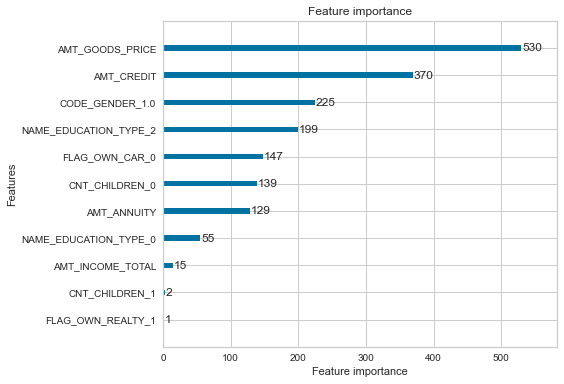

In [63]:
import lightgbm

f = plt.figure(figsize=(5.5, 5.5))
lightgbm.plot_importance(best_lgbm)
plt.tight_layout()

In [64]:
best_lgbm.feature_importances_

array([ 15, 370, 129, 530,   0, 225, 147,   1, 139,   2,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  55,   0, 199])

### lightgbm

In [65]:
lgb_model = lightgbm.LGBMClassifier()

In [66]:
trained_lgb = lgb_model.fit(x_train, y_train)

In [67]:
trained_lgb.score(x_train, y_train)

0.9192663576549832

In [68]:
trained_lgb.predict(x_train)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## CatBoost

### PyCaret

In [69]:
catboost_model = create_model('catboost', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9189,0.6530,0.0003,0.2222,0.0007,0.0004,0.0058
1,0.9190,0.6497,0.0007,0.5000,0.0014,0.0012,0.0162
2,0.9188,0.6523,0.0002,0.0556,0.0003,-0.0002,-0.0015
Mean,0.9189,0.6516,0.0004,0.2593,0.0008,0.0005,0.0069
SD,0.0001,0.0014,0.0002,0.1833,0.0004,0.0005,0.0073


In [70]:
best_cb, tuner = tune_model(catboost_model,
                            fold=3,
                            search_library='scikit-optimize',
                            return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9190,0.6363,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9190,0.6307,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9190,0.6362,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.9190,0.6344,0.0000,0.0000,0.0000,0.0000,0.0000
SD,0.0000,0.0026,0.0000,0.0000,0.0000,0.0000,0.0000


### catboost

In [71]:
from catboost import CatBoostClassifier, Pool

In [72]:
catboost_train_data = Pool(x_train, 
                           y_train)

cb_model = CatBoostClassifier()

In [73]:
cb_model.fit(catboost_train_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.105129
0:	learn: 0.5930407	total: 21.1ms	remaining: 21.1s
1:	learn: 0.5159530	total: 41.2ms	remaining: 20.6s
2:	learn: 0.4579808	total: 61.5ms	remaining: 20.4s
3:	learn: 0.4145457	total: 81.9ms	remaining: 20.4s
4:	learn: 0.3821635	total: 103ms	remaining: 20.5s
5:	learn: 0.3574347	total: 122ms	remaining: 20.2s
6:	learn: 0.3388101	total: 143ms	remaining: 20.3s
7:	learn: 0.3242486	total: 164ms	remaining: 20.3s
8:	learn: 0.3130374	total: 187ms	remaining: 20.6s
9:	learn: 0.3044398	total: 208ms	remaining: 20.6s
10:	learn: 0.2977244	total: 230ms	remaining: 20.6s
11:	learn: 0.2928861	total: 244ms	remaining: 20.1s
12:	learn: 0.2890777	total: 265ms	remaining: 20.1s
13:	learn: 0.2854816	total: 286ms	remaining: 20.1s
14:	learn: 0.2830461	total: 306ms	remaining: 20.1s
15:	learn: 0.2807844	total: 328ms	remaining: 20.2s
16:	learn: 0.2791721	total: 350ms	remaining: 20.2s
17:	learn: 0.2777684	total: 372ms	remaining: 20.3s
18:	learn: 0.2767397	total: 398ms	remaining: 20.5s
19:	lea

161:	learn: 0.2657875	total: 4.15s	remaining: 21.5s
162:	learn: 0.2657612	total: 4.17s	remaining: 21.4s
163:	learn: 0.2657399	total: 4.2s	remaining: 21.4s
164:	learn: 0.2657056	total: 4.22s	remaining: 21.4s
165:	learn: 0.2656796	total: 4.24s	remaining: 21.3s
166:	learn: 0.2656506	total: 4.27s	remaining: 21.3s
167:	learn: 0.2656268	total: 4.29s	remaining: 21.2s
168:	learn: 0.2655905	total: 4.31s	remaining: 21.2s
169:	learn: 0.2655768	total: 4.34s	remaining: 21.2s
170:	learn: 0.2655198	total: 4.36s	remaining: 21.1s
171:	learn: 0.2654983	total: 4.39s	remaining: 21.1s
172:	learn: 0.2654573	total: 4.41s	remaining: 21.1s
173:	learn: 0.2654363	total: 4.43s	remaining: 21s
174:	learn: 0.2654192	total: 4.46s	remaining: 21s
175:	learn: 0.2653927	total: 4.48s	remaining: 21s
176:	learn: 0.2653751	total: 4.5s	remaining: 20.9s
177:	learn: 0.2653584	total: 4.52s	remaining: 20.9s
178:	learn: 0.2653422	total: 4.54s	remaining: 20.8s
179:	learn: 0.2653292	total: 4.56s	remaining: 20.8s
180:	learn: 0.265304

325:	learn: 0.2624043	total: 7.99s	remaining: 16.5s
326:	learn: 0.2623944	total: 8.01s	remaining: 16.5s
327:	learn: 0.2623838	total: 8.03s	remaining: 16.5s
328:	learn: 0.2623640	total: 8.05s	remaining: 16.4s
329:	learn: 0.2623398	total: 8.07s	remaining: 16.4s
330:	learn: 0.2623306	total: 8.1s	remaining: 16.4s
331:	learn: 0.2623131	total: 8.12s	remaining: 16.3s
332:	learn: 0.2622945	total: 8.14s	remaining: 16.3s
333:	learn: 0.2622780	total: 8.17s	remaining: 16.3s
334:	learn: 0.2622461	total: 8.19s	remaining: 16.3s
335:	learn: 0.2622325	total: 8.21s	remaining: 16.2s
336:	learn: 0.2622168	total: 8.24s	remaining: 16.2s
337:	learn: 0.2622012	total: 8.26s	remaining: 16.2s
338:	learn: 0.2621888	total: 8.28s	remaining: 16.1s
339:	learn: 0.2621791	total: 8.3s	remaining: 16.1s
340:	learn: 0.2621630	total: 8.32s	remaining: 16.1s
341:	learn: 0.2621416	total: 8.35s	remaining: 16.1s
342:	learn: 0.2621242	total: 8.38s	remaining: 16.1s
343:	learn: 0.2621052	total: 8.41s	remaining: 16s
344:	learn: 0.26

488:	learn: 0.2598537	total: 12.2s	remaining: 12.7s
489:	learn: 0.2598409	total: 12.2s	remaining: 12.7s
490:	learn: 0.2598311	total: 12.2s	remaining: 12.7s
491:	learn: 0.2598171	total: 12.3s	remaining: 12.7s
492:	learn: 0.2597973	total: 12.3s	remaining: 12.6s
493:	learn: 0.2597813	total: 12.3s	remaining: 12.6s
494:	learn: 0.2597773	total: 12.4s	remaining: 12.6s
495:	learn: 0.2597574	total: 12.4s	remaining: 12.6s
496:	learn: 0.2597474	total: 12.4s	remaining: 12.6s
497:	learn: 0.2597349	total: 12.4s	remaining: 12.5s
498:	learn: 0.2597248	total: 12.5s	remaining: 12.5s
499:	learn: 0.2597092	total: 12.5s	remaining: 12.5s
500:	learn: 0.2596929	total: 12.5s	remaining: 12.5s
501:	learn: 0.2596749	total: 12.5s	remaining: 12.4s
502:	learn: 0.2596552	total: 12.6s	remaining: 12.4s
503:	learn: 0.2596432	total: 12.6s	remaining: 12.4s
504:	learn: 0.2596273	total: 12.6s	remaining: 12.4s
505:	learn: 0.2596144	total: 12.6s	remaining: 12.3s
506:	learn: 0.2596041	total: 12.7s	remaining: 12.3s
507:	learn: 

648:	learn: 0.2574499	total: 16s	remaining: 8.67s
649:	learn: 0.2574319	total: 16s	remaining: 8.64s
650:	learn: 0.2574206	total: 16.1s	remaining: 8.62s
651:	learn: 0.2574031	total: 16.1s	remaining: 8.59s
652:	learn: 0.2573922	total: 16.1s	remaining: 8.57s
653:	learn: 0.2573841	total: 16.2s	remaining: 8.55s
654:	learn: 0.2573726	total: 16.2s	remaining: 8.52s
655:	learn: 0.2573565	total: 16.2s	remaining: 8.5s
656:	learn: 0.2573505	total: 16.2s	remaining: 8.47s
657:	learn: 0.2573376	total: 16.3s	remaining: 8.45s
658:	learn: 0.2573284	total: 16.3s	remaining: 8.42s
659:	learn: 0.2573152	total: 16.3s	remaining: 8.4s
660:	learn: 0.2573085	total: 16.3s	remaining: 8.37s
661:	learn: 0.2572914	total: 16.3s	remaining: 8.35s
662:	learn: 0.2572797	total: 16.4s	remaining: 8.32s
663:	learn: 0.2572661	total: 16.4s	remaining: 8.3s
664:	learn: 0.2572559	total: 16.4s	remaining: 8.27s
665:	learn: 0.2572455	total: 16.4s	remaining: 8.24s
666:	learn: 0.2572332	total: 16.5s	remaining: 8.22s
667:	learn: 0.25722

810:	learn: 0.2552974	total: 19.8s	remaining: 4.61s
811:	learn: 0.2552794	total: 19.8s	remaining: 4.59s
812:	learn: 0.2552671	total: 19.8s	remaining: 4.57s
813:	learn: 0.2552599	total: 19.9s	remaining: 4.54s
814:	learn: 0.2552446	total: 19.9s	remaining: 4.52s
815:	learn: 0.2552291	total: 19.9s	remaining: 4.49s
816:	learn: 0.2552192	total: 19.9s	remaining: 4.46s
817:	learn: 0.2551981	total: 20s	remaining: 4.44s
818:	learn: 0.2551876	total: 20s	remaining: 4.41s
819:	learn: 0.2551703	total: 20s	remaining: 4.39s
820:	learn: 0.2551592	total: 20s	remaining: 4.36s
821:	learn: 0.2551506	total: 20s	remaining: 4.34s
822:	learn: 0.2551407	total: 20.1s	remaining: 4.31s
823:	learn: 0.2551308	total: 20.1s	remaining: 4.29s
824:	learn: 0.2551217	total: 20.1s	remaining: 4.26s
825:	learn: 0.2551089	total: 20.1s	remaining: 4.24s
826:	learn: 0.2550961	total: 20.1s	remaining: 4.21s
827:	learn: 0.2550865	total: 20.2s	remaining: 4.19s
828:	learn: 0.2550648	total: 20.2s	remaining: 4.16s
829:	learn: 0.2550559	

969:	learn: 0.2533527	total: 23.5s	remaining: 726ms
970:	learn: 0.2533310	total: 23.5s	remaining: 702ms
971:	learn: 0.2533130	total: 23.5s	remaining: 678ms
972:	learn: 0.2533030	total: 23.6s	remaining: 654ms
973:	learn: 0.2532839	total: 23.6s	remaining: 630ms
974:	learn: 0.2532775	total: 23.6s	remaining: 605ms
975:	learn: 0.2532631	total: 23.6s	remaining: 581ms
976:	learn: 0.2532465	total: 23.7s	remaining: 557ms
977:	learn: 0.2532385	total: 23.7s	remaining: 533ms
978:	learn: 0.2532292	total: 23.7s	remaining: 509ms
979:	learn: 0.2532196	total: 23.7s	remaining: 485ms
980:	learn: 0.2532104	total: 23.8s	remaining: 460ms
981:	learn: 0.2532008	total: 23.8s	remaining: 436ms
982:	learn: 0.2531817	total: 23.8s	remaining: 412ms
983:	learn: 0.2531702	total: 23.8s	remaining: 388ms
984:	learn: 0.2531589	total: 23.9s	remaining: 363ms
985:	learn: 0.2531490	total: 23.9s	remaining: 339ms
986:	learn: 0.2531340	total: 23.9s	remaining: 315ms
987:	learn: 0.2531219	total: 23.9s	remaining: 291ms
988:	learn: 

In [74]:
cb_model.score(catboost_train_data)

0.9197307431904588

In [75]:
catboost_test_data = Pool(x_test)

In [76]:
cb_model.predict(catboost_test_data)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Early stopping

In [77]:
import catboost

new_cb = catboost.CatBoostClassifier(**best_cb.get_params())
new_cb.set_params(n_estimators=1000)

In [78]:
new_cb.fit(X=x_train,
           y=y_train,
           eval_set=(x_test, y_test),
           early_stopping_rounds=10,
           plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [79]:
new_cb.get_params()

{'depth': 2,
 'l2_leaf_reg': 164,
 'border_count': 254,
 'verbose': False,
 'random_strength': 0.4103674691507784,
 'task_type': 'CPU',
 'n_estimators': 1000,
 'random_state': 3185}

In [80]:
new_cb.tree_count_

1000